<a href="https://colab.research.google.com/github/SohailaDiab/365-Days-of-AI/blob/main/Day_06/Introduction_to_Classfication_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

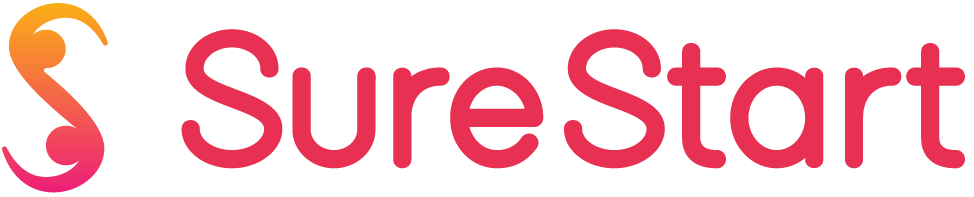

#Day 6 Objectives: 
* To introduce you to loss functions. 


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification Losses

In classification, the outputs are in form of a class or a category. The label or number assigned to the classes do not have a numerical meaning. 

For example, an input with class label 0 cannot be numerically compared with an input with class label 1. 

In [3]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

169001437/169001437 [==============================] - 13s 0us/step


In [4]:
np.unique(training_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Kullback-Leibler Divergence [KLD]

Kullback Leibler Divergence Loss is a measure of how a distribution varies from a reference distribution (or a baseline distribution). A Kullback Leibler Divergence Loss of zero means that both the probability distributions are identical.

The number of information lost in the predicted distribution is used as a measure.

$$KLD(p||q) = \int_x p(x) \log \frac{p(x)}{q(x)} dx$$

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='kl_divergence', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 19s 6ms/step - loss: 455.9123 - accuracy: 0.0101 - val_loss: 455.9109 - val_accuracy: 0.0101
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 455.9120 - accuracy: 0.0100 - val_loss: 455.9109 - val_accuracy: 0.0101
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 455.9124 - accuracy: 0.0103 - val_loss: 455.9109 - val_accuracy: 0.0101
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 455.9126 - accuracy: 0.0096 - val_loss: 455.9109 - val_accuracy: 0.0101
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 455.9124 - accuracy: 0.0097 - val_loss: 455.9109 - val_accuracy: 0.0101
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 455.9121 - accuracy: 0.0101 - val_loss: 455.9109 - val_accuracy: 0.0101
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 455.9122 - accuracy: 0.0100 - val_l

##Binary Cross Entropy
Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

Cross-entropy is also related to and often confused with logistic loss, called log loss. Although the two measures are derived from a different source, when used as loss functions for classification models, both measures calculate the same quantity and can be used interchangeably.

Binary crossentropy is a loss function that is used in binary classification tasks. These are tasks that answer a question with only two choices (yes or no, A or B, 0 or 1, left or right). Several independent such questions can be answered at the same time, as in multi-label classification or in binary image segmentation. Formally, this loss is equal to the average of the categorical crossentropy loss on many two-category tasks.

$$BCE = -\frac{1}{N} \sum_{i=1}^N y_i \cdot \log(p(y_i)) + (1-y_i) \cdot \log(1- p(y_i))$$

In [6]:
training_labels = tf.reshape(tf.one_hot(training_labels, 100), [training_labels.shape[0], 100])
print(training_labels.shape)

test_labels = tf.reshape(tf.one_hot(test_labels, 100), [test_labels.shape[0], 100])
print(test_labels.shape)

(50000, 100)
(10000, 100)


In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 0.0601 - accuracy: 0.0358 - val_loss: 0.0507 - val_accuracy: 0.0683
Epoch 2/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0488 - accuracy: 0.1030 - val_loss: 0.0466 - val_accuracy: 0.1397
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0454 - accuracy: 0.1595 - val_loss: 0.0443 - val_accuracy: 0.1739
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0432 - accuracy: 0.1985 - val_loss: 0.0425 - val_accuracy: 0.2113
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0414 - accuracy: 0.2288 - val_loss: 0.0413 - val_accuracy: 0.2446
Epoch 6/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0401 - accuracy: 0.2547 - val_loss: 0.0399 - val_accuracy: 0.2622
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0391 - accuracy: 0.2750 - val_loss: 0.0395 - val_accuracy

## Question 1

Do you see any problems/errors with the above code? Please describe.

### Answer 1

This is a multi-class, single-label classification problem. Meaning, we have multiple classes but they are exclusive (a data point can map to only ONE label).

Therefore, the softmax activation function was used correctly here.

However, it was wrong to use binary cross-entropy loss.
Softmax outputs a probability for each class and we pick the highest probability to be the label. 

Using binary cross entropy here means that it will consider our problem to be multi-label as it will look at the output of the sigmoid for each class to be binary (will be considered a label if probability is above a certain threshold)

## Categorical Cross Entropy

This is the most common setting for classification problems. Cross-entropy loss increases as the **predicted probability** strays away from the **actual label**.

Note that we have to compare the probabilities (e.g. [0.20, 0.75, 0.05]) of all the classes with the actual labels (e.g., [0, 1, 0]). The actual labels would be one-hot encoding.

An important aspect of this is that cross entropy loss penalizes heavily the predictions that are confident but wrong.

We are multiplying the log of the actual predicted probability for the ground truth class.

$$CCE = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i)$$ 

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 10s 6ms/step - loss: 3.9418 - accuracy: 0.0957 - val_loss: 3.5633 - val_accuracy: 0.1575
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.3637 - accuracy: 0.1916 - val_loss: 3.2697 - val_accuracy: 0.2132
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 3.1034 - accuracy: 0.2411 - val_loss: 3.0547 - val_accuracy: 0.2515
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.9386 - accuracy: 0.2691 - val_loss: 2.9630 - val_accuracy: 0.2753
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.8108 - accuracy: 0.2953 - val_loss: 2.8953 - val_accuracy: 0.2860
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 2.7140 - accuracy: 0.3159 - val_loss: 2.7840 - val_accuracy: 0.3129
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6350 - accuracy: 0.3319 - val_loss: 2.7547 - val_accuracy

## Question 2

Now that you know how CCE works, you need to code it. It should give the same answer as `tf.keras.metrics.categorical_crossentropy` would.

### Answer 2

In [21]:
def categorical_crossentropy(true, pred):
    
    loss = sum(-(1/len(true)) * sum(true * np.log(pred)))

    return loss

true = tf.constant([[0.0, 1.0, 0.0],
                    [1.0, 0.0, 0.0],
                    [1.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0]])
pred = tf.constant([[0.20, 0.70, 0.10],
                    [0.80, 0.05, 0.15],
                    [0.75, 0.10, 0.15],
                    [0.25, 0.15, 0.60]])

loss = categorical_crossentropy(true, pred)
print(loss)

print('------------------------------')

loss = tf.keras.metrics.categorical_crossentropy(true, pred)
loss = tf.reduce_mean(loss)
print(loss)

tf.Tensor(0.34458154, shape=(), dtype=float32)
------------------------------
tf.Tensor(0.34458154, shape=(), dtype=float32)


## Sparse Categorical Cross Entropy

Both, Categorical Cross Entropy [CCE] and Sparse Categorical Cross Entropy [SCCE] have the same loss function. The only difference is the format of $y_i$ (i.e., true labels).

If $y_i$'s are one-hot encoded, we should use CCE. Examples (for a 3-class classification): [1,0,0], [0,1,0], [0,0,1]

But if $y_i$'s are integers, use SCCE. Examples for above 3-class classification problem: [1], [2], [3]

The usage entirely depends on how we load our dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

$$SCCE = -\log(\hat{y}_i)$$ for $i$ where $one\text{-}hot\text{-}encoding[i] = 1$ 

In [22]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 10s 5ms/step - loss: 2.5830 - accuracy: 0.2018 - val_loss: 2.3114 - val_accuracy: 0.2719
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2131 - accuracy: 0.3131 - val_loss: 2.1460 - val_accuracy: 0.3389
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0646 - accuracy: 0.3576 - val_loss: 2.0421 - val_accuracy: 0.3632
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9677 - accuracy: 0.3875 - val_loss: 1.9469 - val_accuracy: 0.3897
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8871 - accuracy: 0.4097 - val_loss: 1.8990 - val_accuracy: 0.4027
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8223 - accuracy: 0.4308 - val_loss: 1.8752 - val_accuracy: 0.4161
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7723 - accuracy: 0.4465 - val_loss: 1.8317 - val_accuracy

## Question 3

What is the difference between a Multi-class and Multi-label Classification problem, and what sort of loss function would we need to learn them?

### Answer 3

A **multi-class classification** problem is when we have more than 2 classes, but each data point can have only ONE label. 

Here, a softmax activation function is used as well as **Categorical Cross-Entropy** loss function.

<br>
<br>

A **multi-label classification problem** is when we have more than 2 classes, and the classes are NOT mutually exclusive. Meaning, a data point can have more than 1 label. 

Here, a **sigmoid** activation function is used as well as **Binary Cross-Entropy** loss function.

## Question 4
What is the relationship between Binary Cross entropy and Categorical Cross entropy?

### Answer 4

They are mathematically identical for 2 classes. A 2-class Categorical Cross-Entropy would yield the same result as a 2-class Binary Cross-Entropy.

Binary Cross-Entropy is a special case of Categorical Cross-Entropy for N=2

$$
\begin{align}
\mathcal{L}(\theta)
&= -\frac{1}{n}\sum_{i=1}^n\sum_{j=1}^m y_{ij}\log(p_{ij}) = CCE\\
&= -\frac{1}{n}\sum_{i=1}^n \left[y_i \log(p_i) + (1-y_i) \log(1-p_i) \right] = BCE
\end{align}
$$

```py
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', ...)
# is the same as
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', ...)
```

## Question 5

What is the relationship between Sparse Cross entropy and Categorical Cross entropy?

### Answer 5

Sparse Cross-Entropy is a sparse variant of the Multi-Class Cross Entropy Loss. It has the same loss function as Categorical Cross Entropy.

However, categorical Cross-Entropy is used when the labels are one-hot encoded, and Sparse Cross-Entropy is used when the labels are label (integer) encoded.

# **Upload this Day 6 Colab Notebook to your Github repository under "Day 6" folder. Also add your *Reflection* on today's learning in README.md**